In [43]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

import os
file_path = '/content/drive/My Drive/Personal/JP'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = os.path.join(file_path, 'growth_analyst_dataset.xlsx')
df = pd.read_excel(df)

df

,Unnamed: 0,TB_MAC_ID,TONIE_PTR_ID,PLAY_SECONDS,PLAY_DATE,PLAY_START_HOUR_LT,TB_ACT_DATE,TONIE_PRODKEY,TONIE_TYPE,TONIE_DOWNLOAD_DATE,ACTIVATED_ON_THIS_BOX,CONTENT_TYPE,content_type
0,0,M929192B20D77,C15500304E0Z16280,896,2022-10-22,9,2022-02-26,H72G50001,CONTENT,2022-05-10,1,default,NaN
1,1,M929192B20D77,C15500304E0Z16280,1662,2022-10-22,9,2022-02-26,H72G50001,CONTENT,2022-05-10,1,default,NaN
2,2,M929192B20D77,C15500304E0Z16280,153,2022-10-25,19,2022-02-26,H72G50001,CONTENT,2022-05-10,1,default,NaN
3,3,M929192B20D77,C15500304E0Z16280,22,2022-10-28,15,2022-02-26,H72G50001,CONTENT,2022-05-10,1,default,NaN
4,4,M929192B20D77,C15500304E0Z16280,23,2022-10-28,8,2022-02-26,H72G50001,CONTENT,2022-05-10,1,default,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412409,412409,U929AA1V20D77,K16500304E0M4C0AA,3077,2022-01-23,22,2021-12-25,Q62X50002,CONTENT,2021-12-25,1,default,NaN
412410,412410,U929AA1V20D77,K16500304E0M4C0AA,3082,2022-01-23,6,2021-12-25,Q62X50002,CONTENT,2021-12-25,1,default,NaN
412411,412411,U929AA1V20D77,K16500304E0M4C0AA,3242,2022-01-23,21,2021-12-25,Q62X50002,CONTENT,2021-12-25,1,default,NaN
412412,412412,U929AA1V20D77,K16500304E0M4C0AA,3258,2022-01-23,20,2021-12-25,Q62X50002,CONTENT,2021-12-25,1,default,NaN


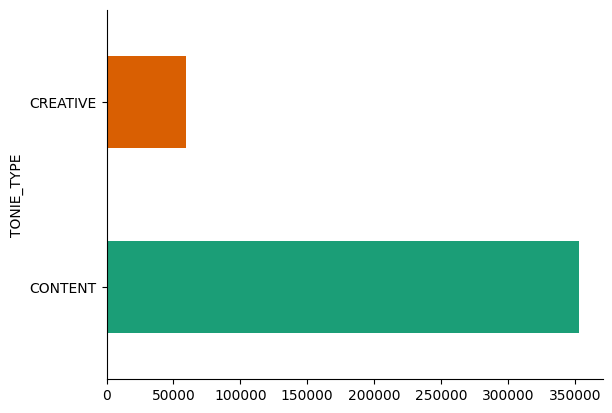

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('TONIE_TYPE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

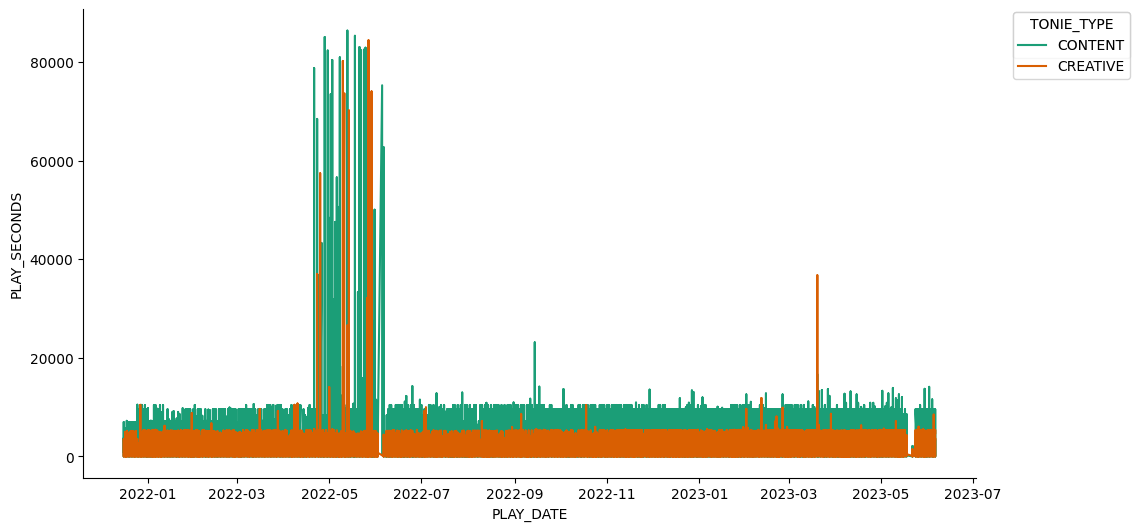

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PLAY_DATE']
  ys = series['PLAY_SECONDS']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('PLAY_DATE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('TONIE_TYPE')):
  _plot_series(series, series_name, i)
  fig.legend(title='TONIE_TYPE', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PLAY_DATE')
_ = plt.ylabel('PLAY_SECONDS')

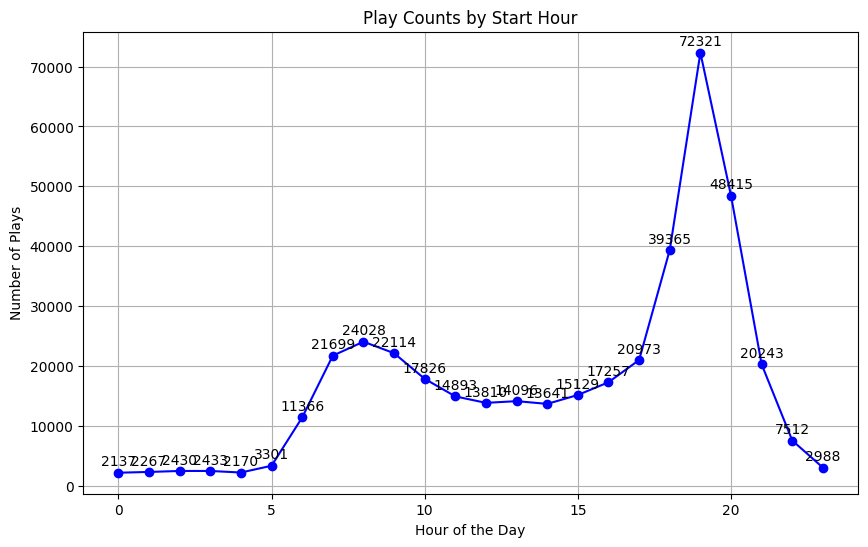

In [40]:
hourly_play_counts = df.groupby('PLAY_START_HOUR_LT').size()

# Creating a line chart
plt.figure(figsize=(10, 6))
plt.plot(hourly_play_counts.index, hourly_play_counts.values, marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Play Counts by Start Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Plays')
plt.grid(True)

# Annotating the data points with the counts
for hour, count in zip(hourly_play_counts.index, hourly_play_counts.values):
    plt.annotate(f'{count}', (hour, count), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

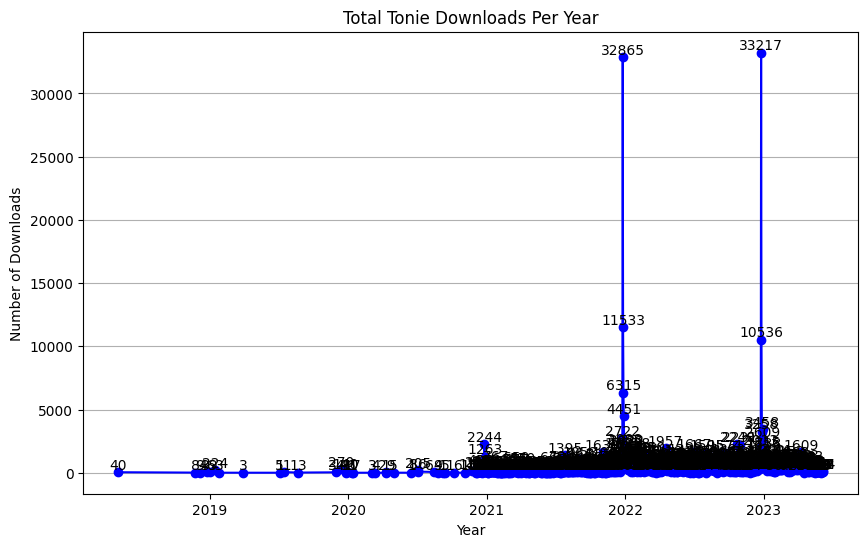

In [42]:
yearly_download_counts = df.groupby('TONIE_DOWNLOAD_DATE').size()

# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_download_counts.index, yearly_download_counts.values, marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Total Tonie Downloads Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Downloads')
plt.grid(axis='y')

# Annotating the bars with the counts
for year, count in zip(yearly_download_counts.index, yearly_download_counts.values):
    plt.text(year, count, str(count), ha='center', va='bottom')

plt.show()

In [11]:
# EDA

print("Total minutes played", df['PLAY_SECONDS'].sum()/60)
print("Dates between", df['PLAY_DATE'].min(),df['PLAY_DATE'].max())
print("Total days",(df['PLAY_DATE'].max() - df['PLAY_DATE'].min()))
print("Total Unique tonie boxes",df['TB_MAC_ID'].nunique())
print("Total Unique tonie figues",df['TONIE_PTR_ID'].nunique())
print("Hours played between", df['PLAY_START_HOUR_LT'].min(),df['PLAY_START_HOUR_LT'].max())
print("Total tonie type \n",df['TONIE_TYPE'].value_counts())


Total minutes played 7550106.65
Dates between 2021-12-16 00:00:00 2023-06-06 00:00:00
Total days 537 days 00:00:00
Total Unique tonie boxes 892
Total Unique tonie figues 10351
Hours played between 0 23
Total tonie type 
 TONIE_TYPE
CONTENT     353118
CREATIVE     59296
Name: count, dtype: int64


In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

Unnamed: 0                    0
TB_MAC_ID                     0
TONIE_PTR_ID                  0
PLAY_SECONDS                  0
PLAY_DATE                     0
PLAY_START_HOUR_LT            0
TB_ACT_DATE                   0
TONIE_PRODKEY                 0
TONIE_TYPE                    0
TONIE_DOWNLOAD_DATE         698
ACTIVATED_ON_THIS_BOX         0
CONTENT_TYPE              52001
content_type             412414
dtype: int64

In [14]:
df = df[['TB_MAC_ID', 'TONIE_PTR_ID', 'PLAY_SECONDS', 'PLAY_DATE',
       'PLAY_START_HOUR_LT', 'TB_ACT_DATE', 'TONIE_PRODKEY', 'TONIE_TYPE',
       'TONIE_DOWNLOAD_DATE', 'ACTIVATED_ON_THIS_BOX']]
df

,TB_MAC_ID,TONIE_PTR_ID,PLAY_SECONDS,PLAY_DATE,PLAY_START_HOUR_LT,TB_ACT_DATE,TONIE_PRODKEY,TONIE_TYPE,TONIE_DOWNLOAD_DATE,ACTIVATED_ON_THIS_BOX
0,M929192B20D77,C15500304E0Z16280,896,2022-10-22,9,2022-02-26,H72G50001,CONTENT,2022-05-10,1
1,M929192B20D77,C15500304E0Z16280,1662,2022-10-22,9,2022-02-26,H72G50001,CONTENT,2022-05-10,1
2,M929192B20D77,C15500304E0Z16280,153,2022-10-25,19,2022-02-26,H72G50001,CONTENT,2022-05-10,1
3,M929192B20D77,C15500304E0Z16280,22,2022-10-28,15,2022-02-26,H72G50001,CONTENT,2022-05-10,1
4,M929192B20D77,C15500304E0Z16280,23,2022-10-28,8,2022-02-26,H72G50001,CONTENT,2022-05-10,1
...,...,...,...,...,...,...,...,...,...,...
412409,U929AA1V20D77,K16500304E0M4C0AA,3077,2022-01-23,22,2021-12-25,Q62X50002,CONTENT,2021-12-25,1
412410,U929AA1V20D77,K16500304E0M4C0AA,3082,2022-01-23,6,2021-12-25,Q62X50002,CONTENT,2021-12-25,1
412411,U929AA1V20D77,K16500304E0M4C0AA,3242,2022-01-23,21,2021-12-25,Q62X50002,CONTENT,2021-12-25,1
412412,U929AA1V20D77,K16500304E0M4C0AA,3258,2022-01-23,20,2021-12-25,Q62X50002,CONTENT,2021-12-25,1


In [15]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,TB_MAC_ID,TONIE_PTR_ID,PLAY_SECONDS,PLAY_DATE,PLAY_START_HOUR_LT,TB_ACT_DATE,TONIE_PRODKEY,TONIE_TYPE,TONIE_DOWNLOAD_DATE,ACTIVATED_ON_THIS_BOX
5137,U91FB3BJ20D77,F17500304E0D6E516,225,2022-06-10,19,2022-03-11,A71L50002,CONTENT,NaT,0
5138,U91FB3BJ20D77,F17500304E0D6E516,349,2022-06-10,19,2022-03-11,A71L50002,CONTENT,NaT,0
5139,U91FB3BJ20D77,F17500304E0D6E516,63,2022-06-11,7,2022-03-11,A71L50002,CONTENT,NaT,0
5140,U91FB3BJ20D77,F17500304E0D6E516,265,2022-06-11,7,2022-03-11,A71L50002,CONTENT,NaT,0
5141,U91FB3BJ20D77,F17500304E0D6E516,867,2022-06-11,7,2022-03-11,A71L50002,CONTENT,NaT,0
...,...,...,...,...,...,...,...,...,...,...
378830,N51FB9ATB0B11,W15500304E0X7CFDF,798,2022-07-10,22,2021-12-07,Z70I50001,CONTENT,NaT,0
378831,N51FB9ATB0B11,W15500304E0X7CFDF,54,2022-07-24,12,2021-12-07,Z70I50001,CONTENT,NaT,0
378832,N51FB9ATB0B11,W15500304E0X7CFDF,441,2022-07-24,12,2021-12-07,Z70I50001,CONTENT,NaT,0
378833,N51FB9ATB0B11,W15500304E0X7CFDF,24,2022-08-22,12,2021-12-07,Z70I50001,CONTENT,NaT,0


In [16]:
df.describe()

,PLAY_SECONDS,PLAY_DATE,PLAY_START_HOUR_LT,TB_ACT_DATE,TONIE_DOWNLOAD_DATE,ACTIVATED_ON_THIS_BOX
count,412414.000000,412414,412414.000000,412414,411716,412414.000000
mean,1098.426336,2022-10-28 13:03:19.459766528,14.797323,2022-02-24 01:52:17.881837824,2022-06-08 00:53:33.275170560,0.932008
min,11.000000,2021-12-16 00:00:00,0.000000,2018-12-06 00:00:00,2018-05-05 00:00:00,0.000000
25%,48.000000,2022-07-03 00:00:00,10.000000,2021-11-18 00:00:00,2021-12-26 00:00:00,1.000000
50%,329.000000,2022-12-13 00:00:00,17.000000,2021-12-26 00:00:00,2022-06-18 00:00:00,1.000000
75%,1658.000000,2023-03-09 00:00:00,19.000000,2022-09-20 00:00:00,2022-12-25 00:00:00,1.000000
max,86350.000000,2023-06-06 00:00:00,23.000000,2023-05-10 00:00:00,2023-06-06 00:00:00,1.000000
std,1679.318773,NaN,5.288401,NaN,NaN,0.251733


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412414 entries, 0 to 412413
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   TB_MAC_ID              412414 non-null  object        
 1   TONIE_PTR_ID           412414 non-null  object        
 2   PLAY_SECONDS           412414 non-null  int64         
 3   PLAY_DATE              412414 non-null  datetime64[ns]
 4   PLAY_START_HOUR_LT     412414 non-null  int64         
 5   TB_ACT_DATE            412414 non-null  datetime64[ns]
 6   TONIE_PRODKEY          412414 non-null  object        
 7   TONIE_TYPE             412414 non-null  object        
 8   TONIE_DOWNLOAD_DATE    411716 non-null  datetime64[ns]
 9   ACTIVATED_ON_THIS_BOX  412414 non-null  int64         
dtypes: datetime64[ns](3), int64(3), object(4)
memory usage: 31.5+ MB


In [18]:
retention_data = df.groupby('TB_MAC_ID').agg(unique_tonies=('TONIE_PTR_ID', 'nunique'),
                                               total_play_minutes=('PLAY_SECONDS', 'sum'),
                                               first_play_date=('PLAY_DATE', 'min'),
                                               last_play_date=('PLAY_DATE', 'max')).reset_index()

retention_data['total_play_minutes'] = retention_data['total_play_minutes']/60

retention_data['Customer_retention_in_days'] = (retention_data['last_play_date'] - retention_data['first_play_date']).dt.days
retention_data

,TB_MAC_ID,unique_tonies,total_play_minutes,first_play_date,last_play_date,Customer_retention_in_days
0,A1D2311XFC45C,17,15679.600000,2022-01-08,2023-06-06,514
1,A20AB40F685E1,8,3851.150000,2022-12-20,2023-06-05,167
2,A25C445Z2CAB3,18,18544.583333,2021-12-16,2023-06-05,536
3,A2AD2E3AFC45C,41,6722.550000,2022-01-01,2023-06-06,521
4,A49B95DKB0B11,12,5593.200000,2021-12-26,2023-05-31,521
...,...,...,...,...,...,...
887,ZC6EDA0Q70041,9,530.783333,2023-04-23,2023-06-03,41
888,ZC8376EH20D77,22,3006.750000,2022-08-18,2023-05-31,286
889,ZD27D96C38D26,5,1400.533333,2021-12-25,2023-05-07,498
890,ZF23F02L6C79B,11,6746.650000,2022-12-26,2023-06-06,162


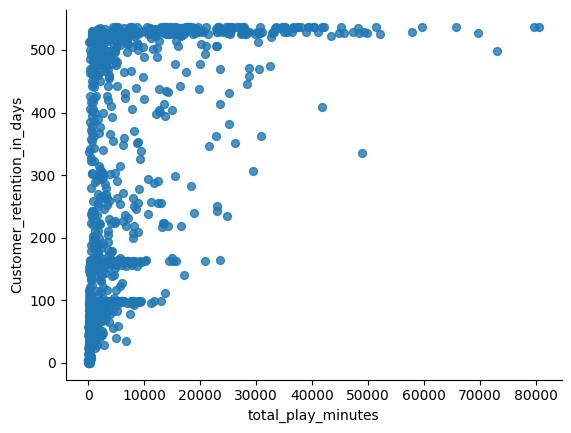

In [19]:
# @title total_play_seconds vs active_duration_days

from matplotlib import pyplot as plt
retention_data.plot(kind='scatter', x='total_play_minutes', y='Customer_retention_in_days', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

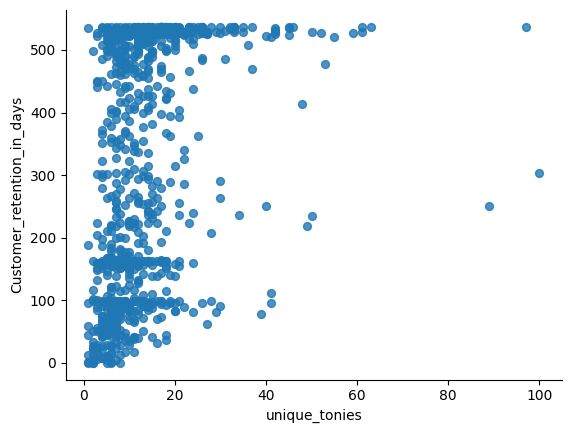

In [20]:
from matplotlib import pyplot as plt
retention_data.plot(kind='scatter', x='unique_tonies', y='Customer_retention_in_days', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
correlation_matrix = retention_data[['unique_tonies', 'total_play_minutes', 'Customer_retention_in_days']].corr()
correlation_matrix

,unique_tonies,total_play_minutes,Customer_retention_in_days
unique_tonies,1.000000,0.361841,0.342642
total_play_minutes,0.361841,1.000000,0.504053
Customer_retention_in_days,0.342642,0.504053,1.000000


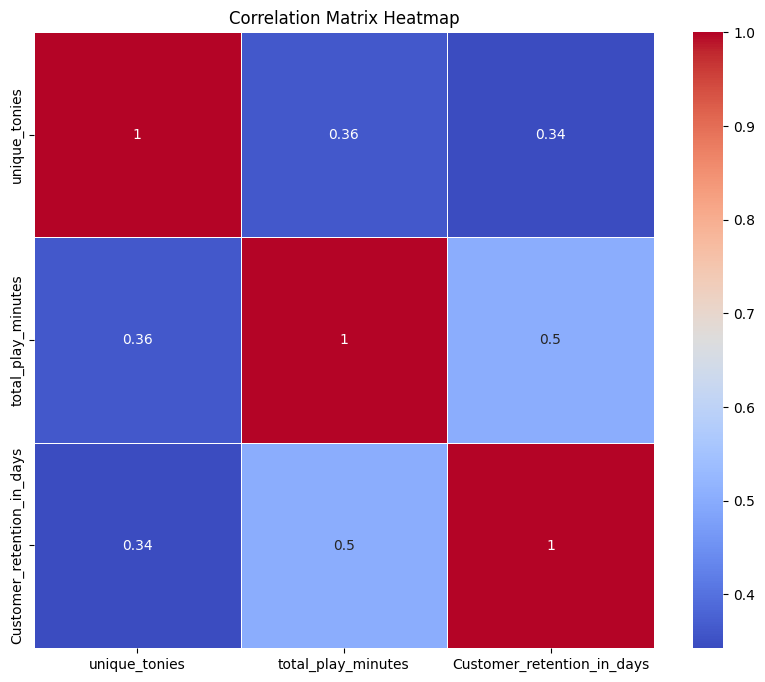

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [23]:
corr_unique_tonies_duration, _ = pearsonr(retention_data['unique_tonies'], retention_data['Customer_retention_in_days'])
corr_play_seconds_duration, _ = pearsonr(retention_data['total_play_minutes'], retention_data['Customer_retention_in_days'])

print(f'Pearson correlation (unique_tonies vs. active_duration_days): {corr_unique_tonies_duration}')
print(f'Pearson correlation (total_play_seconds vs. active_duration_days): {corr_play_seconds_duration}')

Pearson correlation (unique_tonies vs. active_duration_days): 0.34264181854530706
Pearson correlation (total_play_seconds vs. active_duration_days): 0.5040534541475093


In [24]:
tonie_figures_contibution = df.groupby('TONIE_PTR_ID').agg(unique_tonies=('TONIE_PTR_ID', 'nunique'),
                                               total_play_minutes=('PLAY_SECONDS', 'sum'),
                                               first_play_date=('PLAY_DATE', 'min'),
                                               last_play_date=('PLAY_DATE', 'max')).reset_index()

tonie_figures_contibution['total_play_minutes'] = tonie_figures_contibution['total_play_minutes']/60
tonie_figures_contibution['Customer_retention_in_days'] = (tonie_figures_contibution['last_play_date'] - tonie_figures_contibution['first_play_date']).dt.days
tonie_figures_contibution


,TONIE_PTR_ID,unique_tonies,total_play_minutes,first_play_date,last_play_date,Customer_retention_in_days
0,A08500304E0Y2BD2C,1,2007.766667,2022-12-23,2023-06-06,165
1,A08500304E0Y5FA3C,1,472.733333,2022-10-27,2023-06-01,217
2,A0C500304E0W5DF12,1,184.733333,2022-10-08,2023-05-17,221
3,A0D500304E0O53BD3,1,480.816667,2022-01-09,2023-04-25,471
4,A0D500304E0W867E9,1,26.133333,2021-12-25,2022-03-26,91
...,...,...,...,...,...,...
10346,Z1C500304E0SD668B,1,2.866667,2023-05-16,2023-05-25,9
10347,Z1C500304E0U42D30,1,253.666667,2023-03-23,2023-06-05,74
10348,Z1C500304E0UC79C6,1,231.800000,2023-06-03,2023-06-06,3
10349,Z1C500304E0Y14BE4,1,113.016667,2023-05-03,2023-05-17,14


In [25]:
top= tonie_figures_contibution.sort_values(by='Customer_retention_in_days', ascending=False).head(1000).reset_index()
top



,index,TONIE_PTR_ID,unique_tonies,total_play_minutes,first_play_date,last_play_date,Customer_retention_in_days
0,2441,G11500304E0VED1DA,1,36337.216667,2021-12-16,2023-06-06,537
1,1342,D16500304E0CE813B,1,3623.500000,2021-12-16,2023-06-06,537
2,6405,Q10500304E0C52412,1,26327.466667,2021-12-16,2023-06-06,537
3,8837,W12500304E0N0BE56,1,37022.350000,2021-12-16,2023-06-06,537
4,7646,T14500304E0JAFFCC,1,24193.483333,2021-12-16,2023-06-06,537
...,...,...,...,...,...,...,...
995,8042,U14500304E0IE0482,1,199.583333,2021-12-16,2023-03-23,462
996,1661,E14500304E0T4DCFE,1,422.700000,2021-12-25,2023-04-01,462
997,9439,X17500304E0Y9905E,1,165.950000,2022-02-24,2023-06-01,462
998,5293,N14500304E0TF810A,1,927.883333,2022-02-01,2023-05-08,461


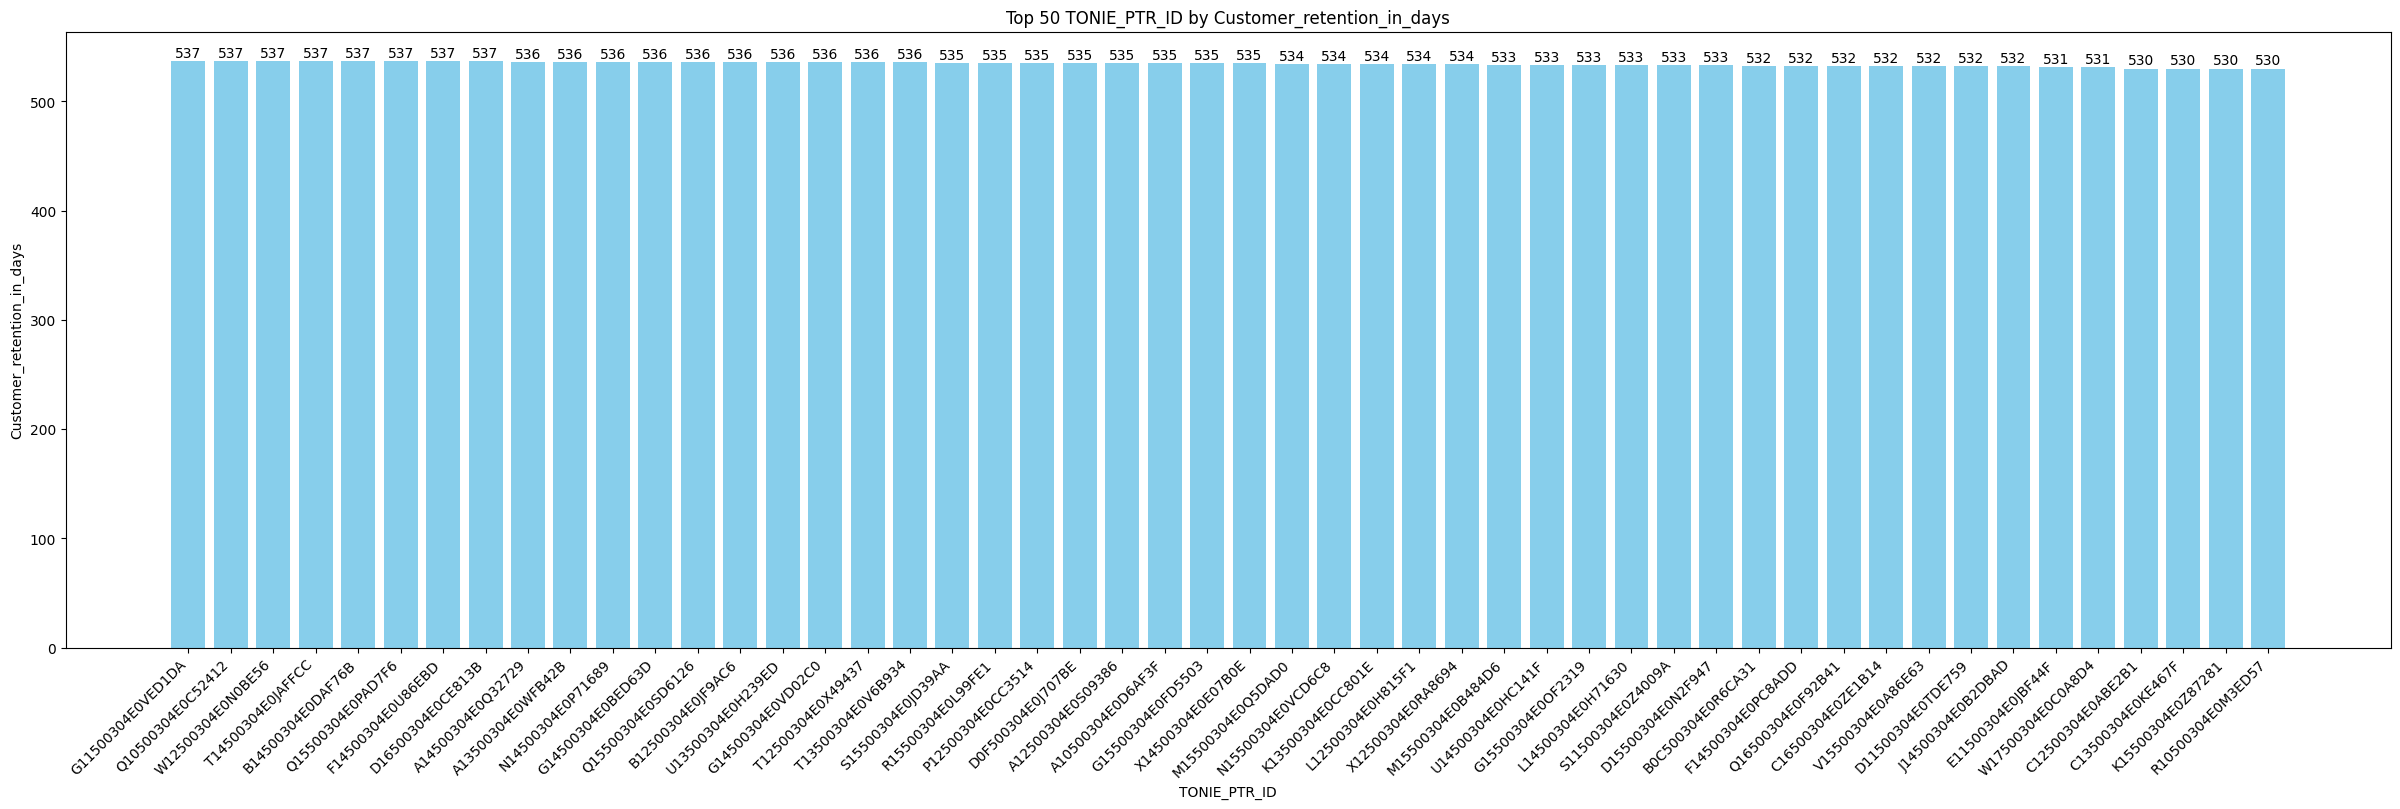

In [26]:
top_50 = top.sort_values(by='Customer_retention_in_days', ascending=False).head(50)

# Create a bar chart
plt.figure(figsize=(30, 8))
bars = plt.bar(top_50['TONIE_PTR_ID'], top_50['Customer_retention_in_days'], color='skyblue')

# Add title and labels
plt.title('Top 50 TONIE_PTR_ID by Customer_retention_in_days')
plt.xlabel('TONIE_PTR_ID')
plt.ylabel('Customer_retention_in_days')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Annotate the bars with the values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom')

# Display the chart
plt.show()

In [27]:
df['ACTIVATED_ON_THIS_BOX'].value_counts()

ACTIVATED_ON_THIS_BOX
1    384373
0     28041
Name: count, dtype: int64

In [55]:
agg_df = df.groupby('TONIE_PTR_ID').agg(
    tot_owned=('ACTIVATED_ON_THIS_BOX', lambda x: (x == 1).sum()),
    tot_borrowed=('ACTIVATED_ON_THIS_BOX', lambda x: (x == 0).sum())).sort_values(by=['tot_borrowed', 'tot_owned'], ascending=[False, False]).reset_index()


agg_df

,TONIE_PTR_ID,tot_owned,tot_borrowed
0,R16500304E0XD765A,8,378
1,E16500304E0T6F583,0,376
2,N18500304E0Z9F783,281,366
3,H10500304E0C0C547,0,270
4,A18500304E0C43EC2,11,264
...,...,...,...
10346,Z19500304E0UC08FA,1,0
10347,Z1B500304E0E6246D,1,0
10348,Z1B500304E0K2138F,1,0
10349,Z1B500304E0O11AF7,1,0


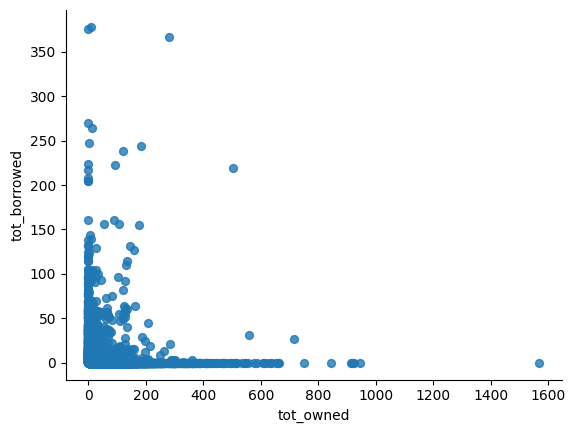

In [29]:
# @title tot_owned vs tot_borrowed

from matplotlib import pyplot as plt
agg_df.plot(kind='scatter', x='tot_owned', y='tot_borrowed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

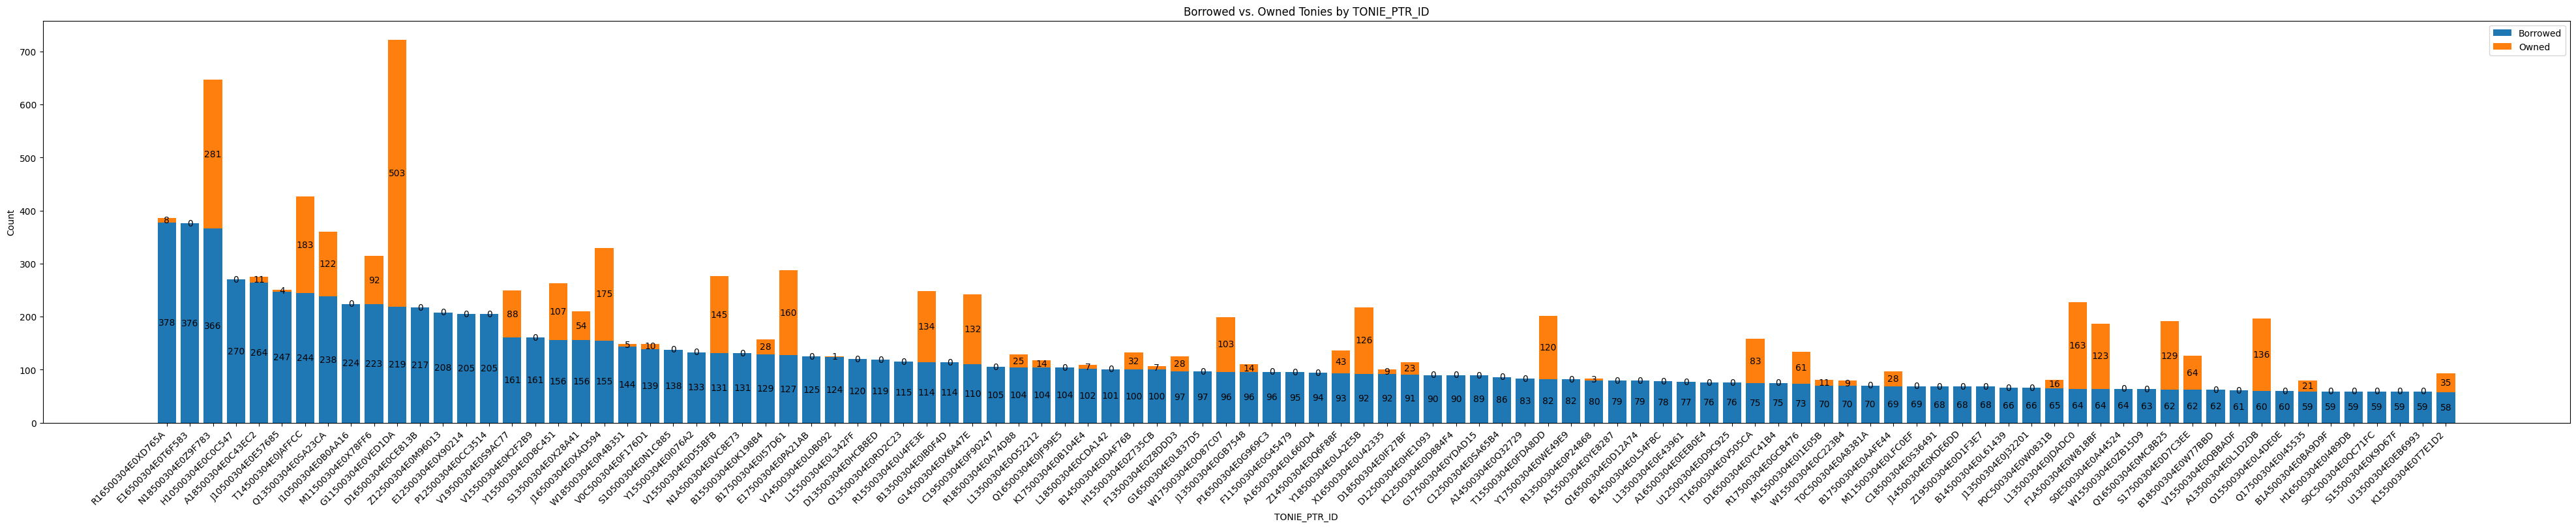

In [30]:
agg_df = agg_df.head(100)


plt.figure(figsize=(50, 8))


bars1 = plt.bar(agg_df['TONIE_PTR_ID'], agg_df['tot_borrowed'], label='Borrowed')
bars2 = plt.bar(agg_df['TONIE_PTR_ID'], agg_df['tot_owned'], bottom=agg_df['tot_borrowed'], label='Owned')

# Add title and labels
plt.title('Borrowed vs. Owned Tonies by TONIE_PTR_ID')
plt.xlabel('TONIE_PTR_ID')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend()

# Annotate the bars with the values
for bar1, bar2 in zip(bars1, bars2):
    yval1 = bar1.get_height()
    yval2 = bar2.get_height()
    plt.text(bar1.get_x() + bar1.get_width() / 2, yval1 / 2, int(yval1), ha='center', va='center')
    plt.text(bar2.get_x() + bar2.get_width() / 2, yval1 + yval2 / 2, int(yval2), ha='center', va='center')

In [31]:
correlation_matrix = agg_df[['tot_borrowed', 'tot_owned']].corr()
correlation_matrix

,tot_borrowed,tot_owned
tot_borrowed,1.000000,0.264956
tot_owned,0.264956,1.000000


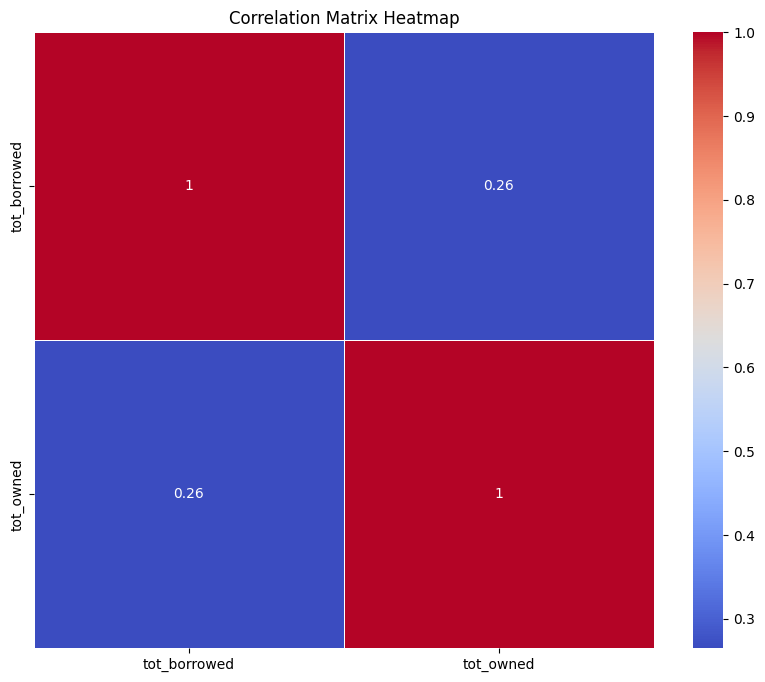

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

sql query for both the question if incase im analysing from database


Q1
```
SELECT TB_MAC_ID,
        COUNT(DISTINCT TONIE_PTR_ID) as unique_tonies,
        MIN(PLAY_DATE) as first_date,
        MAX(PLAY_DATE) as last_date,
        DATE_DIFF(MAX(PLAY_DATE), MIN(PLAY_DATE), DAY) AS active_duration_days,
        ROUND(SUM(PLAY_SECONDS)/60,2) as Tot_minutes
        
        
FROM `dbt-demo-project-386814.raj_demo.growth_analyst`
Group by 1
order by DATE_DIFF(MAX(PLAY_DATE), MIN(PLAY_DATE), DAY) desc
```

Q2

```
SELECT TONIE_PTR_ID,
        SUM(CASE WHEN ACTIVATED_ON_THIS_BOX = 1 THEN 1 END) as Total_Owned,
        SUM(CASE WHEN ACTIVATED_ON_THIS_BOX = 0 THEN 1 END) as Total_Borrowed
        
        
FROM `dbt-demo-project-386814.raj_demo.growth_analyst`
Group by 1
order by SUM(CASE WHEN ACTIVATED_ON_THIS_BOX = 0 THEN 1 END) desc
```

In [57]:
borrowed_and_owned = agg_df[(agg_df['tot_owned'] > 0) & (agg_df['tot_borrowed'] > 0)]
percentage = (len(borrowed_and_owned) / len(agg_df)) * 100
print(f"The percentage of people who borrowed and also owned the product is: {percentage:.2f}%")

The percentage of people who borrowed and also owned the product is: 8.83%
